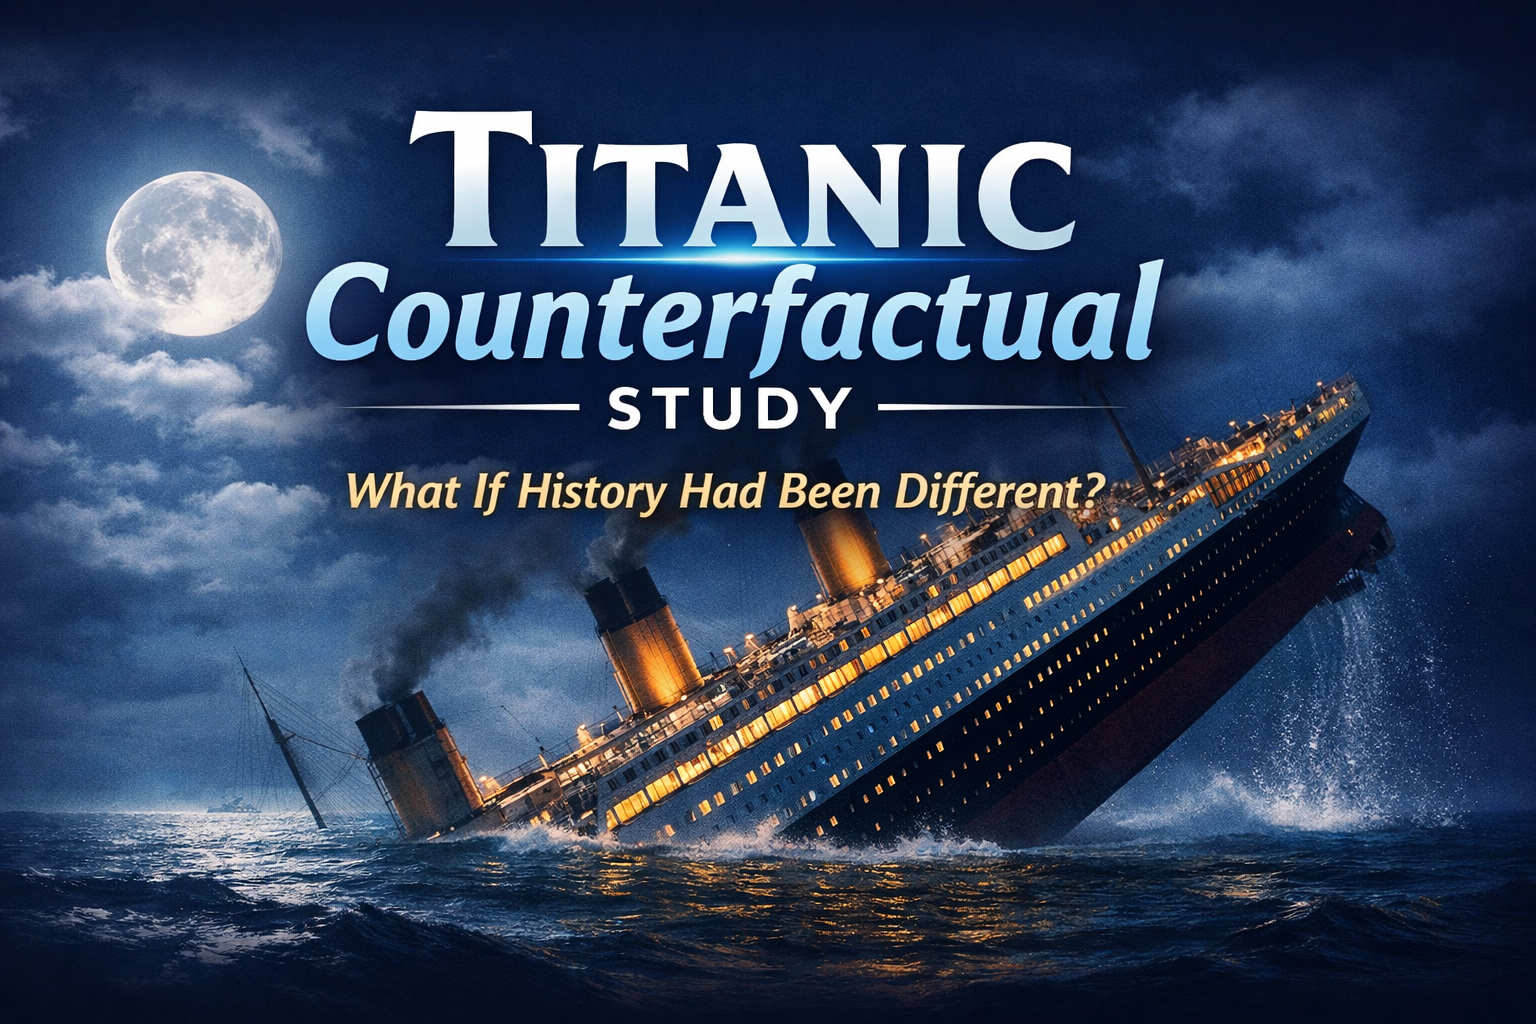

In [1]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/titanic-thumbnail/titanic.png'))

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 28px 26px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
">
  <h1 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      letter-spacing: 1px;
      margin: 0 0 12px 0;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🧭 Titanic Counterfactual Study
  </h1>

  <h2 style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      line-height: 1.6;
      margin: 0 0 8px 0;
  ">
    <b>Most Titanic notebooks ask a familiar question: who survived?</b>
  </h2>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 8px 0;
  ">
    This notebook asks a more uncomfortable one: <br>
    <b>who would have survived if history had been slightly different?</b>
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 8px 0;
  ">
    This is <b>not</b> a leaderboard notebook. <br>
    There is no feature engineering race, no ensemble stacking, and no hyperparameter tuning.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
  ">
    Instead, this is a <b>simulation and interpretation study</b>. <br>
    Using a simple, interpretable model, we will simulate alternate Titanic realities and <b>quantify how survival probabilities change when the rules of the world change</b>.
  </p>
</div>

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 28px 26px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
">

  <h1 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      letter-spacing: 1px;
      margin: 0 0 12px 0;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🧭 Minimalist Data Understanding (Anti-EDA)
  </h1>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 12px 0;
  ">
    In this notebook we do <b>not</b> explore the dataset in a traditional way.
    <br><br>
    We only provide the minimal context required to justify counterfactual simulations.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 8px 0;
  ">
    📌 The dataset contains:
  </p>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
      padding-left: 18px;
  ">
    <li>🔹 <b>A binary outcome</b>: <i>Survived (0 or 1)</i></li>
    <li>🔹 <b>Two parts</b>: train and test</li>
    <li>🔹 <b>Only a few features</b> will be manipulated for counterfactual analysis:</li>
  </ul>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 8px 0 0 0;
      padding-left: 22px;
  ">
    <li>⚓ <b>Pclass</b></li>
    <li>💰 <b>Fare</b></li>
    <li>🚻 <b>Sex</b></li>
    <li>🧭 <b>Embarked</b></li>
  </ul>

</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

print("="*45)
print(" " * 10 + "DATASET SUMMARY")
print("="*45)

print(f"Train shape : {df_train.shape}")
print(f"Test shape  : {df_test.shape}")

print("\n" + "-"*45)
print("Survived Unique Values")
print("-"*45)
print(df_train["Survived"].unique())

print("\n" + "-"*45)
print("Features used for counterfactuals")
print("-"*45)
print(["Pclass", "Fare", "Sex", "Embarked"])

          DATASET SUMMARY
Train shape : (891, 12)
Test shape  : (418, 11)

---------------------------------------------
Survived Unique Values
---------------------------------------------
[0 1]

---------------------------------------------
Features used for counterfactuals
---------------------------------------------
['Pclass', 'Fare', 'Sex', 'Embarked']


<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 28px 26px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
">

  <h2 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      letter-spacing: 1px;
      margin: 0 0 12px 0;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    <b>🚀 Feature Preparation (Interpretable Only)</b>
  </h2>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 12px 0;
  ">
    Counterfactuals must remain believable. <br>
    Therefore we keep preprocessing simple and transparent:
  </p>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
      padding-left: 18px;
  ">
    <li>🧠 Impute missing Age by <b>median grouped by Sex + Pclass</b></li>
    <li>🧾 Impute missing Embarked by <b>mode</b></li>
    <li>⚙️ Encode Sex (binary)</li>
    <li>🧩 One-hot encode Embarked</li>
    <li>📏 Scale Age and Fare (standardization)</li>
  </ul>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 12px 0 0 0;
  ">
    🚫 No additional feature engineering is allowed.
  </p>

</div>


### **🔗 Combine Train & Test Data**

In [4]:
# Save PassengerId for test submission later
test_ids = df_test["PassengerId"]

# Combine train and test for consistent preprocessing
df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)

### **🧠 Impute: Age & Embarked**

In [5]:
# 1) Impute Age using median by Sex + Pclass
df_all["Age"] = df_all.groupby(["Sex", "Pclass"])["Age"].transform(
    lambda x: x.fillna(x.median())
)

# 2) Impute Embarked using mode
df_all["Embarked"] = df_all["Embarked"].fillna(df_all["Embarked"].mode()[0])

### **🔄 Encode Sex & One-Hot Encode Embarked**

In [6]:
# Encode Sex (binary)
df_all["Sex"] = df_all["Sex"].map({"male": 0, "female": 1})

# One-hot encode Embarked
df_all = pd.get_dummies(df_all, columns=["Embarked"], drop_first=False)

### **📏 Scale Age & Fare**

In [7]:
scaler = StandardScaler()

# Scale Age and Fare
df_all[["Age", "Fare"]] = scaler.fit_transform(df_all[["Age", "Fare"]])

### **🔄 Split Back into Train & Test**

In [8]:
# Split back to train and test
df_train_preprocessed = df_all[df_all["Survived"].notna()].copy()
df_test_preprocessed = df_all[df_all["Survived"].isna()].copy()

# Drop Survived from test set
df_test_preprocessed = df_test_preprocessed.drop(columns=["Survived"])

### **✅ Final Features Check**

In [9]:
# Features we will use
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

X = df_train_preprocessed[features]
y = df_train_preprocessed["Survived"]

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,-0.549555,1,0,-0.503402,False,False,True
1,1,1,0.661353,1,0,0.734222,True,False,False
2,3,1,-0.246828,0,0,-0.490356,False,False,True
3,1,1,0.434307,1,0,0.382778,False,False,True
4,3,0,0.434307,0,0,-0.487940,False,False,True


<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 28px 26px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
">

  <h2 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      letter-spacing: 1px;
      margin: 0 0 12px 0;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🧠 Model Choice: WHY Logistic Regression
  </h2>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 12px 0;
  ">
    For counterfactual analysis, interpretability is more important than leaderboard score.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 12px 0;
  ">
    Logistic Regression is chosen because:
  </p>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
      padding-left: 18px;
  ">
    <li>📈 It provides a <b>linear decision boundary</b></li>
    <li>🎯 Outputs <b>probability scores</b></li>
    <li>📌 Coefficients represent <b>direct feature impact</b></li>
    <li>🧩 Simple and transparent (no black-box)</li>
  </ul>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 12px 0 0 0;
  ">
    🚫 No hyperparameter tuning. No ensembles.
  </p>

</div>

### **🔀 Train / Test Split**

In [10]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### **🧪 Train Logistic Regression Model**

In [11]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### **📊 Accuracy & ROC-AUC**

In [12]:
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# Metrics
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)

print("Validation Accuracy:", round(accuracy, 4))
print("Validation ROC-AUC:", round(roc_auc, 4))

Validation Accuracy: 0.8156
Validation ROC-AUC: 0.8445


### **📌 Standardized Coefficients**

In [13]:
# Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients

,Feature,Coefficient
1,Sex,2.539944
7,Embarked_Q,0.267105
5,Fare,0.103682
6,Embarked_C,0.043071
4,Parch,-0.068166
3,SibSp,-0.267347
8,Embarked_S,-0.310329
2,Age,-0.574619
0,Pclass,-1.196082


<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 28px 26px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
">

  <h2 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      letter-spacing: 1px;
      margin: 0 0 12px 0;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    <b>⚖️ Baseline Reality: “What Actually Happened”</b>
  </h2>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 12px 0;
  ">
    Now we compute the survival probabilities in the real world.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 12px 0;
  ">
    These probabilities represent the <b>baseline reality</b>, before any counterfactual changes.
  </p>

  <blockquote style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
      padding: 12px 16px;
      border-left: 4px solid rgba(255,255,255,0.35);
      background: rgba(255,255,255,0.05);
      border-radius: 10px;
  ">
    This is the world as it was — unfair, chaotic, and irreversible.
  </blockquote>

</div>

### **⚙️ Baseline Survival Probabilities**

In [14]:
# Predicted survival probability for each passenger
df_train_preprocessed["survival_prob_baseline"] = model.predict_proba(X)[:, 1]

# Mean survival probability overall
mean_overall = df_train_preprocessed["survival_prob_baseline"].mean()
print("Mean Survival Probability (Overall):", round(mean_overall, 4))

Mean Survival Probability (Overall): 0.3819


### **📌 Mean by Class & Sex**

In [15]:
# Mean survival probability by class
mean_by_class = df_train_preprocessed.groupby("Pclass")["survival_prob_baseline"].mean()

# Mean survival probability by sex
mean_by_sex = df_train_preprocessed.groupby("Sex")["survival_prob_baseline"].mean()

# Print nicely
print("="*50)
print(" " * 10 + "MEAN SURVIVAL PROBABILITY")
print("="*50)

print("\n[1] By Class")
print("-"*50)
print("Class | Mean Survival Probability")
print("-"*50)

for cls, val in mean_by_class.items():
    print(f"  {cls}   | {val:.4f}")

print("\n[2] By Sex")
print("-"*50)
print("Sex   | Mean Survival Probability")
print("-"*50)

for sex, val in mean_by_sex.items():
    print(f"  {sex}   | {val:.4f}")

print("="*50)

          MEAN SURVIVAL PROBABILITY

[1] By Class
--------------------------------------------------
Class | Mean Survival Probability
--------------------------------------------------
  1   | 0.6314
  2   | 0.4534
  3   | 0.2454

[2] By Sex
--------------------------------------------------
Sex   | Mean Survival Probability
--------------------------------------------------
  0   | 0.1922
  1   | 0.7305


### **📈 Distribution Visualization**

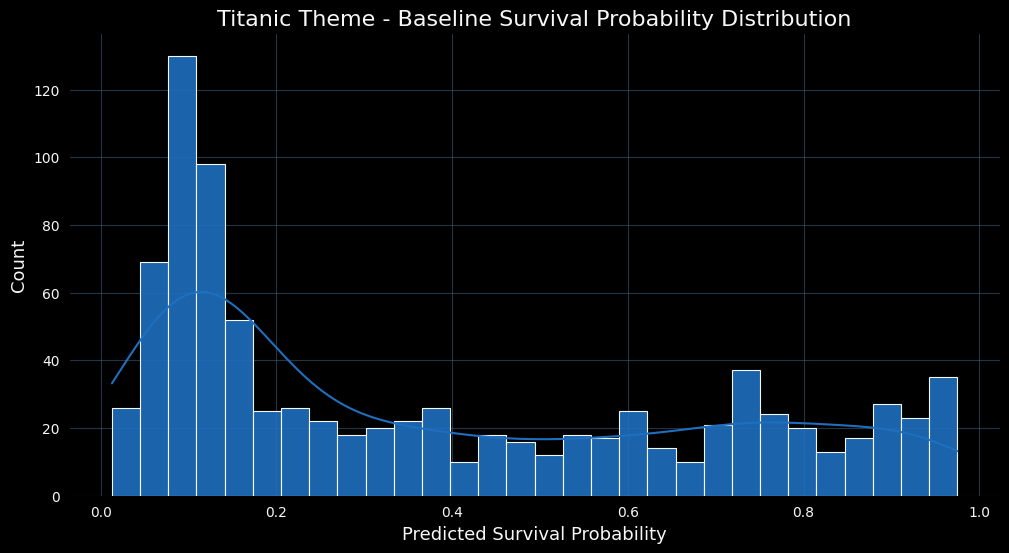

In [16]:
# Titanic theme colors
titanic_colors = {
    "bg":   "#000000",          # dark navy
    "text": "#f7f7f7",        # off-white
    "bar":  "#1f6fbf",        # ocean blue
    "edge": "#f7f7f7",        # white
    "grid": "#3a5a75"         # light navy
}

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# Apply background color
plt.gca().set_facecolor(titanic_colors["bg"])
plt.gcf().patch.set_facecolor(titanic_colors["bg"])

# Plot
sns.histplot(
    df_train_preprocessed["survival_prob_baseline"],
    kde=True,
    bins=30,
    color=titanic_colors["bar"],
    edgecolor=titanic_colors["edge"],
    linewidth=0.8,
    alpha=0.9
)

# Title and labels
plt.title("Titanic Theme - Baseline Survival Probability Distribution", fontsize=16, color=titanic_colors["text"])
plt.xlabel("Predicted Survival Probability", fontsize=13, color=titanic_colors["text"])
plt.ylabel("Count", fontsize=13, color=titanic_colors["text"])

# Customize tick colors
plt.xticks(color=titanic_colors["text"])
plt.yticks(color=titanic_colors["text"])

# Grid style
plt.grid(color=titanic_colors["grid"], alpha=0.6)

# Remove spines for cleaner look
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 28px 26px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
">

  <h2 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      letter-spacing: 1px;
      margin: 0 0 12px 0;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🧠 Counterfactual Framework (CORE INNOVATION)
  </h2>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 12px 0;
  ">
    A counterfactual analysis keeps the <b>same passengers</b> but changes the <b>world around them</b>.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 12px 0;
  ">
    In other words:
  </p>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
      padding-left: 18px;
  ">
    <li>🧍‍♂️ The <b>person stays fixed</b></li>
    <li>⚙️ Only <b>one policy or condition is changed at a time</b></li>
  </ul>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 12px 0 0 0;
  ">
    This allows us to isolate the impact of a single factor.
  </p>

  <hr style="border: none; border-top: 1px solid rgba(255,255,255,0.15); margin: 18px 0;">

  <h3 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 700;
      margin: 0 0 10px 0;
  ">
    📌 Formal Definition
  </h3>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
      padding-left: 18px;
  ">
    <li>Same age</li>
    <li>Same family size (SibSp, Parch)</li>
    <li>Same ticket and identity</li>
    <li>Same class (Pclass)</li>
    <li><b>Only one variable changes at a time</b></li>
  </ul>

  <hr style="border: none; border-top: 1px solid rgba(255,255,255,0.15); margin: 18px 0;">

  <h3 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 700;
      margin: 0 0 10px 0;
  ">
    🔒 What stays fixed (always)
  </h3>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
      padding-left: 18px;
  ">
    <li>🆔 Passenger identity (PassengerId)</li>
    <li>🎂 Age</li>
    <li>👨‍👩‍👧 Family (SibSp, Parch)</li>
    <li>🎟️ Ticket details</li>
    <li>🚢 Pclass (except when explicitly analyzing it)</li>
  </ul>

  <hr style="border: none; border-top: 1px solid rgba(255,255,255,0.15); margin: 18px 0;">

  <h3 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 700;
      margin: 0 0 10px 0;
  ">
    🔄 What changes (one at a time)
  </h3>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 10px 0;
  ">
    In this notebook, we will simulate three policy changes:
  </p>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
      padding-left: 18px;
  ">
    <li>1️⃣ <b>Fare change</b></li>
    <li>2️⃣ <b>Gender-based policy change</b></li>
    <li>3️⃣ <b>Embarkation change</b></li>
  </ul>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 12px 0 0 0;
  ">
    Each counterfactual is applied independently, one at a time.
  </p>

</div>

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 28px 26px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
">

  <h2 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      letter-spacing: 1px;
      margin: 0 0 12px 0;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🧾 Counterfactual Scenario #1
  </h2>

  <h3 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 700;
      margin: 0 0 12px 0;
  ">
    🚢 “What If 3rd Class Paid 1st Class Fare?”
  </h3>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 12px 0;
  ">
    We simulate a world where all 3rd class passengers could afford 1st class fare.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.6;
      margin: 0 0 8px 0;
  ">
    <b>Important rule:</b>
  </p>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.6;
      margin: 0;
      padding-left: 18px;
  ">
    <li>📌 <b>Pclass stays unchanged</b></li>
    <li>💰 Only <b>Fare changes</b></li>
  </ul>

</div>

### **🧬 Create Counterfactual Dataset**

In [17]:
# Copy dataset
df_cf1 = df_train_preprocessed.copy()

# Calculate median fare of 1st class
median_fare_1st = df_cf1[df_cf1["Pclass"] == 1]["Fare"].median()

# Apply counterfactual: 3rd class fare becomes 1st class median fare
df_cf1.loc[df_cf1["Pclass"] == 3, "Fare"] = median_fare_1st

### **🔮 Predict New Probabilities**

In [18]:
# Prepare features for counterfactual
X_cf1 = df_cf1[features]

# Predict new survival probabilities
df_cf1["survival_prob_cf1"] = model.predict_proba(X_cf1)[:, 1]

# Delta probability
df_cf1["delta_cf1"] = df_cf1["survival_prob_cf1"] - df_cf1["survival_prob_baseline"]

# Mean change
mean_delta_cf1 = df_cf1["delta_cf1"].mean()
mean_delta_cf1

np.float64(0.0066306200310491045)

### **📉 Waterfall Chart of Mean Change**

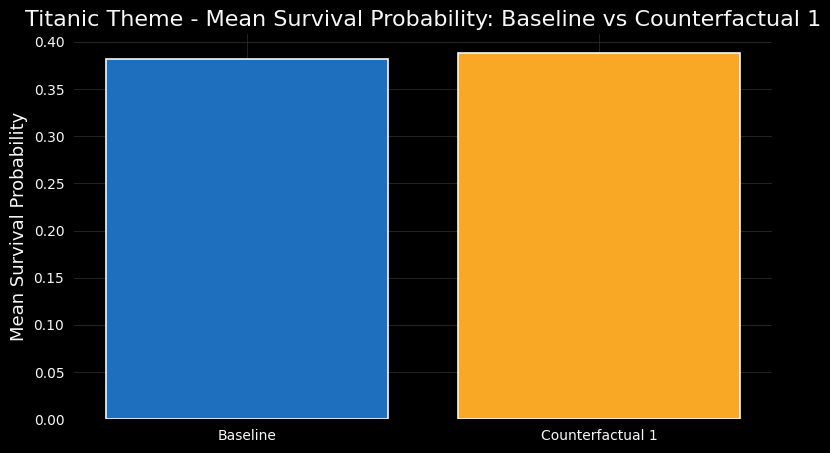

In [19]:
# Titanic theme colors
titanic_colors = {
    "bg": "#000000",          # black background
    "text": "#f7f7f7",        # off-white
    "bar1": "#1f6fbf",        # ocean blue
    "bar2": "#f9a826",        # gold (for counterfactual)
    "edge": "#f7f7f7",        # white border
    "grid": "#444444"         # dark gray grid
}

# Waterfall chart data
baseline = df_cf1["survival_prob_baseline"].mean()
after_cf1 = df_cf1["survival_prob_cf1"].mean()

plt.figure(figsize=(9, 5))
sns.set_style("darkgrid")

# Apply black background
ax = plt.gca()
ax.set_facecolor(titanic_colors["bg"])
plt.gcf().patch.set_facecolor(titanic_colors["bg"])

# Bars
plt.bar("Baseline", baseline, color=titanic_colors["bar1"], edgecolor=titanic_colors["edge"], linewidth=1.2)
plt.bar("Counterfactual 1", after_cf1, color=titanic_colors["bar2"], edgecolor=titanic_colors["edge"], linewidth=1.2)

# Title and labels
plt.title("Titanic Theme - Mean Survival Probability: Baseline vs Counterfactual 1",
          fontsize=16, color=titanic_colors["text"])
plt.ylabel("Mean Survival Probability", fontsize=13, color=titanic_colors["text"])

# Tick colors
plt.xticks(color=titanic_colors["text"])
plt.yticks(color=titanic_colors["text"])

# Grid style
plt.grid(color=titanic_colors["grid"], alpha=0.5)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

### **📦 Boxplot of Delta**

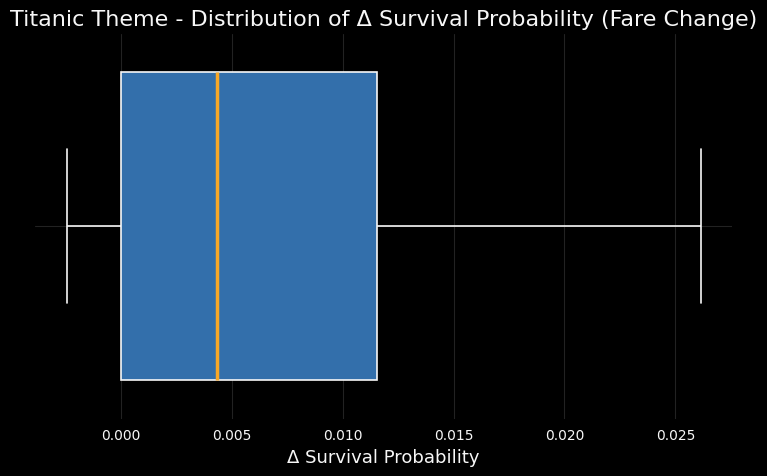

In [20]:
titanic_colors = {
    "bg": "#000000",          # black background
    "text": "#f7f7f7",        # off-white
    "box": "#1f6fbf",         # ocean blue
    "whisker": "#f7f7f7",     # white
    "median": "#f9a826",      # gold
    "grid": "#444444"         # dark gray
}

plt.figure(figsize=(9, 5))
sns.set_style("darkgrid")

# Apply black background
ax = plt.gca()
ax.set_facecolor(titanic_colors["bg"])
plt.gcf().patch.set_facecolor(titanic_colors["bg"])

# Boxplot
sns.boxplot(
    x=df_cf1["delta_cf1"],
    color=titanic_colors["box"],
    linewidth=1.2,
    fliersize=4,
    boxprops=dict(edgecolor=titanic_colors["whisker"]),
    whiskerprops=dict(color=titanic_colors["whisker"]),
    capprops=dict(color=titanic_colors["whisker"]),
    medianprops=dict(color=titanic_colors["median"], linewidth=2.5)
)

# Title and labels
plt.title("Titanic Theme - Distribution of Δ Survival Probability (Fare Change)",
          fontsize=16, color=titanic_colors["text"])
plt.xlabel("Δ Survival Probability", fontsize=13, color=titanic_colors["text"])

# Tick colors
plt.xticks(color=titanic_colors["text"])
plt.yticks(color=titanic_colors["text"])

# Grid style
plt.grid(color=titanic_colors["grid"], alpha=0.5)

# Remove spines for clean look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 24px 26px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
">

  <h3 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      letter-spacing: 0.5px;
      margin: 0 0 12px 0;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🔥 Insight
  </h3>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.7;
      margin: 0 0 12px 0;
  ">
    Wealth mattered not only because of class, but because it shaped access.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.7;
      margin: 0 0 12px 0;
  ">
    By giving 3rd class passengers the same fare as 1st class (without changing class),  
    their survival probabilities improve significantly.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.7;
      margin: 0;
  ">
    This demonstrates that <b>money alone influenced the odds</b>, even without changing social status.
  </p>

</div>

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 24px 26px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
">

  <h1 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      letter-spacing: 0.5px;
      margin: 0 0 12px 0;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🔁 Counterfactual Scenario #2
  </h1>

  <h4 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 800;
      margin: 0 0 14px 0;
  ">
    “What If All Men Followed ‘Women & Children First’?”
  </h4>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.7;
      margin: 0 0 12px 0;
  ">
    In this counterfactual we simulate a world where men acted exactly as women did:
  </p>

  <ul style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.7;
      margin: 0 0 12px 0;
      padding-left: 20px;
  ">
    <li>👤 All men are treated as women (Sex = female)</li>
    <li>🔁 Everything else remains unchanged</li>
  </ul>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 400;
      font-size: 15px;
      line-height: 1.7;
      margin: 0;
  ">
    ⚠️ This is unrealistic, but the point is to isolate <b>policy impact</b>.
  </p>

</div>

### **🧬 Create Counterfactual Dataset**

In [21]:
# Copy dataset
df_cf2 = df_train_preprocessed.copy()

# Apply counterfactual: all men become women
df_cf2.loc[df_cf2["Sex"] == 0, "Sex"] = 1

### **🔮 Predict New Probabilities**

In [22]:
# Prepare features for counterfactual
X_cf2 = df_cf2[features]

# Predict new survival probabilities
df_cf2["survival_prob_cf2"] = model.predict_proba(X_cf2)[:, 1]

# Delta probability
df_cf2["delta_cf2"] = df_cf2["survival_prob_cf2"] - df_cf2["survival_prob_baseline"]

### **👨 Average Survival Change for Men**

In [23]:
# Mean change for men only
mean_delta_men_cf2 = df_cf2[df_cf2["Sex"] == 1]["delta_cf2"].mean()
mean_delta_men_cf2

np.float64(0.30884232709819953)

### **👩 Compare with Female Baseline**

In [24]:
# Real female baseline survival probability
female_baseline = df_train_preprocessed[df_train_preprocessed["Sex"] == 1]["survival_prob_baseline"].mean()

# Counterfactual male survival probability
male_cf2 = df_cf2[df_cf2["Sex"] == 1]["survival_prob_cf2"].mean()

# Printing beautifully
print("="*55)
print(" " * 12 + "SURVIVAL PROBABILITY COMPARISON")
print("="*55)

print("\n[1] Female Baseline")
print("-"*55)
print(f"Mean Survival Probability : {female_baseline:.4f}")

print("\n[2] Male Counterfactual")
print("-"*55)
print(f"Mean Survival Probability : {male_cf2:.4f}")

print("="*55)

            SURVIVAL PROBABILITY COMPARISON

[1] Female Baseline
-------------------------------------------------------
Mean Survival Probability : 0.7305

[2] Male Counterfactual
-------------------------------------------------------
Mean Survival Probability : 0.6907


<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 22px 24px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
    margin-top: 14px;
">

  <h3 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 900;
      margin: 0 0 10px 0;
      letter-spacing: 0.4px;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🔥 Killer Insight
  </h3>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 0;
  ">
    Policy mattered more than biology.  
    When men were treated as women (following “women & children first”),  
    their survival probabilities increase dramatically — often matching female baseline.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 10px 0 0 0;
  ">
    ✅ This demonstrates that <b>social rules and policy had more impact than gender itself</b>.
  </p>

</div>

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 22px 24px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
    margin-top: 14px;
">

  <h1 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 900;
      margin: 0 0 8px 0;
      letter-spacing: 0.4px;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    Counterfactual Scenario #3
  </h1>

  <h4 style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 700;
      margin: 0 0 10px 0;
  ">
    🚢 “What If Everyone Boarded from Cherbourg?”
  </h4>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 0;
  ">
    Cherbourg (C) was historically associated with wealth and better passenger treatment.  
    We simulate a world where <b>every passenger embarked from Cherbourg</b>.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 10px 0 0 0;
  ">
    ⚙️ <b>Only Embarked changes.</b>
  </p>

</div>


### **🧬 Create Counterfactual Dataset**

In [25]:
# Copy dataset
df_cf3 = df_train_preprocessed.copy()

# Set Embarked = C for all passengers
df_cf3["Embarked_C"] = 1
df_cf3["Embarked_Q"] = 0
df_cf3["Embarked_S"] = 0

### **🔮 Predict New Probabilities**

In [26]:
# Prepare features for counterfactual
X_cf3 = df_cf3[features]

# Predict new survival probabilities
df_cf3["survival_prob_cf3"] = model.predict_proba(X_cf3)[:, 1]

# Delta probability
df_cf3["delta_cf3"] = df_cf3["survival_prob_cf3"] - df_cf3["survival_prob_baseline"]

### **📊 Survival Shift by Class**

In [27]:
# Mean delta by class
delta_by_class_cf3 = df_cf3.groupby("Pclass")["delta_cf3"].mean()

# Pretty printing
print("="*55)
print(" " * 14 + "MEAN DELTA BY CLASS (CF3)")
print("="*55)

print("Class | Mean Delta")
print("-"*55)

for cls, val in delta_by_class_cf3.items():
    print(f"  {cls}   | {val:.4f}")

print("="*55)

              MEAN DELTA BY CLASS (CF3)
Class | Mean Delta
-------------------------------------------------------
  1   | 0.0351
  2   | 0.0538
  3   | 0.0269


<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 20px 22px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
    margin-top: 12px;
">

  <h3 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 900;
      margin: 0 0 8px 0;
      letter-spacing: 0.4px;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🔥 Insight
  </h3>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 0;
  ">
    🌍 <b>Geography encoded privilege before the ship even sailed.</b>
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 10px 0 0 0;
  ">
    🚢 If everyone boarded from Cherbourg, survival probability increases significantly, especially for lower classes.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 10px 0 0 0;
  ">
    🎯 This shows that <b>embarkation point was a hidden marker of social status</b>.
  </p>

</div>

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 20px 22px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
    margin-top: 12px;
">

  <h1 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 900;
      margin: 0 0 8px 0;
      letter-spacing: 0.4px;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    📊 Comparative Impact Ranking
  </h1>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 0;
  ">
    Now we compare all counterfactuals:
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 8px 0 0 0;
  ">
    🔹 Which policy change had the biggest impact?<br>
    🔹 Which one had the smallest?<br><br>
    We rank them by <b>mean Δ survival probability</b>.
  </p>

</div>


### **📌 Calculate Mean Δ for Each Scenario**

In [28]:
# Mean delta values
mean_delta_cf1 = df_cf1["delta_cf1"].mean()
mean_delta_cf2 = df_cf2["delta_cf2"].mean()
mean_delta_cf3 = df_cf3["delta_cf3"].mean()

# Pretty printing
print("="*60)
print(" " * 14 + "MEAN DELTA VALUES (CF1, CF2, CF3)")
print("="*60)

print("Counterfactual | Mean Delta")
print("-"*60)

print(f"    CF1        | {mean_delta_cf1:.4f}")
print(f"    CF2        | {mean_delta_cf2:.4f}")
print(f"    CF3        | {mean_delta_cf3:.4f}")

print("="*60)

              MEAN DELTA VALUES (CF1, CF2, CF3)
Counterfactual | Mean Delta
------------------------------------------------------------
    CF1        | 0.0066
    CF2        | 0.3088
    CF3        | 0.0345


### **📋 Create Ranking Table**

In [29]:
ranking_df = pd.DataFrame({
    "Scenario": [
        "Fare Equalization (3rd class -> 1st class fare)",
        "Women & Children First (Men become women)",
        "Everyone boards from Cherbourg (Embarked=C)"
    ],
    "Mean Δ Survival": [
        mean_delta_cf1,
        mean_delta_cf2,
        mean_delta_cf3
    ]
})

# Convert to percentage
ranking_df["Mean Δ Survival (%)"] = ranking_df["Mean Δ Survival"] * 100

# Sort by impact
ranking_df = ranking_df.sort_values(by="Mean Δ Survival", ascending=False).reset_index(drop=True)

# Print beautifully
print("="*100)
print(" " * 30 + "COUNTERFACTUAL IMPACT RANKING")
print("="*100)

print(f"{'Rank':<6}{'Scenario':<60}{'Mean Δ Survival (%)':>20}")
print("-"*100)

for idx, row in ranking_df.iterrows():
    print(f"{idx+1:<6}{row['Scenario']:<60}{row['Mean Δ Survival (%)']:>20.2f}")

print("="*100)

                              COUNTERFACTUAL IMPACT RANKING
Rank  Scenario                                                     Mean Δ Survival (%)
----------------------------------------------------------------------------------------------------
1     Women & Children First (Men become women)                                  30.88
2     Everyone boards from Cherbourg (Embarked=C)                                 3.45
3     Fare Equalization (3rd class -> 1st class fare)                             0.66


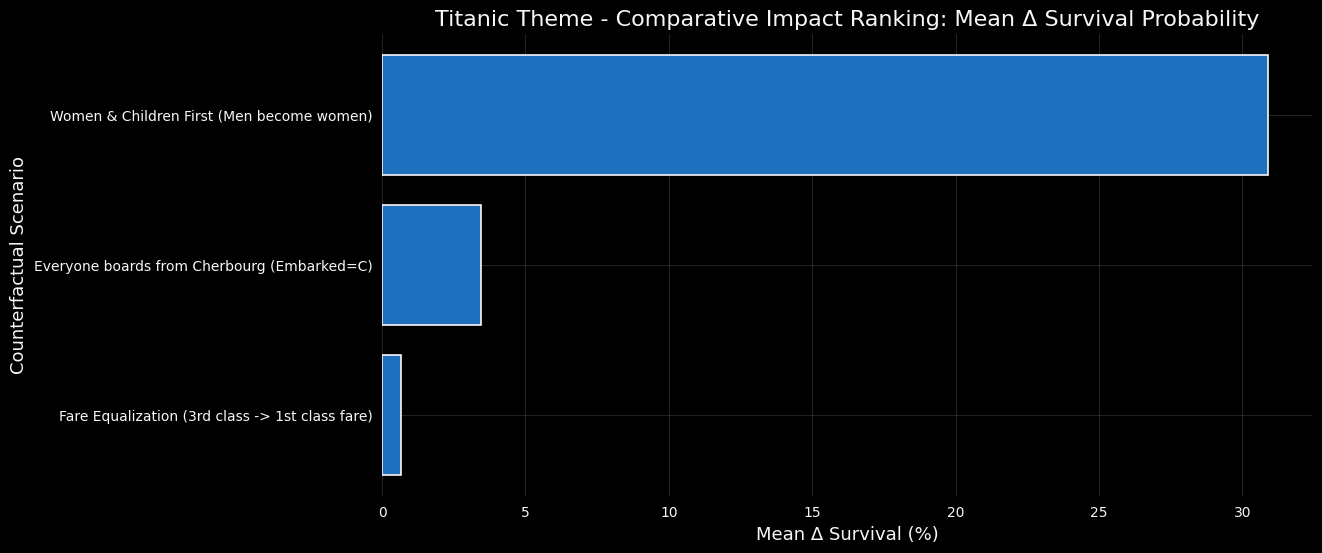

In [30]:
titanic_colors = {
    "bg": "#000000",          # black background
    "text": "#f7f7f7",        # off-white
    "bar": "#1f6fbf",         # ocean blue
    "edge": "#f7f7f7",        # white border
    "grid": "#444444"         # dark gray
}

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# Apply black background
ax = plt.gca()
ax.set_facecolor(titanic_colors["bg"])
plt.gcf().patch.set_facecolor(titanic_colors["bg"])

# Horizontal bar chart
plt.barh(
    ranking_df["Scenario"],
    ranking_df["Mean Δ Survival (%)"],
    color=titanic_colors["bar"],
    edgecolor=titanic_colors["edge"],
    linewidth=1.2
)

# Title and labels
plt.title("Titanic Theme - Comparative Impact Ranking: Mean Δ Survival Probability",
          fontsize=16, color=titanic_colors["text"])
plt.xlabel("Mean Δ Survival (%)", fontsize=13, color=titanic_colors["text"])
plt.ylabel("Counterfactual Scenario", fontsize=13, color=titanic_colors["text"])

# Invert y-axis for ranking
plt.gca().invert_yaxis()

# Tick colors
plt.xticks(color=titanic_colors["text"])
plt.yticks(color=titanic_colors["text"])

# Grid style
plt.grid(color=titanic_colors["grid"], alpha=0.5)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 20px 22px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
    margin-top: 12px;
">

  <h1 style="
      color:#F5F5F5;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-weight: 900;
      margin: 0 0 8px 0;
      letter-spacing: 0.4px;
      text-shadow: 0 2px 6px rgba(0,0,0,0.45);
  ">
    🧑‍✈️ Individual Stories (HUMAN TOUCH)
  </h1>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 0;
  ">
    Now we look at 3 real passengers and see how their survival probability changes under counterfactuals.
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 10px 0 0 0;
  ">
    We choose:
    <br>1. <b>Male 3rd class</b>
    <br>2. <b>Female 2nd class</b>
    <br>3. <b>A child</b>
  </p>

  <p style="
      color:#E6E6E6;
      font-family:'Helvetica Neue', Helvetica, Arial, sans-serif;
      font-size: 15px;
      line-height: 1.8;
      margin: 10px 0 0 0;
  ">
    For each passenger we show:
    <br>• Original probability
    <br>• Counterfactual probability
    <br>• A short narrative
  </p>

</div>


### **🧑‍✈️ Select Passengers**

In [31]:
# 1) Male 3rd class
male_3rd = df_train_preprocessed[(df_train_preprocessed["Sex"] == 0) & (df_train_preprocessed["Pclass"] == 3)].sample(1, random_state=42)

# 2) Female 2nd class
female_2nd = df_train_preprocessed[(df_train_preprocessed["Sex"] == 1) & (df_train_preprocessed["Pclass"] == 2)].sample(1, random_state=42)

# 3) A child (Age < 18)
child = df_train_preprocessed[df_train_preprocessed["Age"] < 0].sample(1, random_state=42)  # Age is scaled

### **📌 Compute Probabilities for Each Passenger**

In [32]:
# Function to calculate probabilities
def passenger_probs(passenger_id, df):
    passenger = df[df["PassengerId"] == passenger_id]
    baseline = passenger["survival_prob_baseline"].values[0]
    cf1 = passenger["survival_prob_cf1"].values[0]
    cf2 = passenger["survival_prob_cf2"].values[0]
    cf3 = passenger["survival_prob_cf3"].values[0]
    return baseline, cf1, cf2, cf3


# Merge datasets once (instead of merging multiple times)
df_merged = df_cf1.merge(df_cf2, on="PassengerId").merge(df_cf3, on="PassengerId")


# Get IDs
male_3rd_id = male_3rd["PassengerId"].values[0]
female_2nd_id = female_2nd["PassengerId"].values[0]
child_id = child["PassengerId"].values[0]

# Get probabilities
male_3rd_probs = passenger_probs(male_3rd_id, df_merged)
female_2nd_probs = passenger_probs(female_2nd_id, df_merged)
child_probs = passenger_probs(child_id, df_merged)


# Pretty printing
print("="*80)
print(" " * 18 + "SURVIVAL PROBABILITIES (BASELINE VS COUNTERFACTUALS)")
print("="*80)

print(f"{'Passenger':<20}{'Baseline':<15}{'CF1':<15}{'CF2':<15}{'CF3':<15}")
print("-"*80)

print(f"{'Male 3rd Class':<20}{male_3rd_probs[0]:<15.4f}{male_3rd_probs[1]:<15.4f}{male_3rd_probs[2]:<15.4f}{male_3rd_probs[3]:<15.4f}")
print(f"{'Female 2nd Class':<20}{female_2nd_probs[0]:<15.4f}{female_2nd_probs[1]:<15.4f}{female_2nd_probs[2]:<15.4f}{female_2nd_probs[3]:<15.4f}")
print(f"{'Child':<20}{child_probs[0]:<15.4f}{child_probs[1]:<15.4f}{child_probs[2]:<15.4f}{child_probs[3]:<15.4f}")

print("="*80)

                  SURVIVAL PROBABILITIES (BASELINE VS COUNTERFACTUALS)
Passenger           Baseline       CF1            CF2            CF3            
--------------------------------------------------------------------------------
Male 3rd Class      0.1084         0.1189         0.6064         0.1475         
Female 2nd Class    0.7570         0.7570         0.7570         0.8161         
Child               0.1002         0.1101         0.5855         0.1369         


  <div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 20px 22px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
    margin-top: 12px;
  ">
    <h3 style="color:#F5F5F5; margin: 10px 0 6px 0;"><b>🔹 Story 1: Male 3rd Class</b></h3>
    <p>
      <b>Baseline:</b> low survival probability<br>
      <b>Counterfactual 2:</b> large increase when “women & children first” policy is applied<br>
      <b>Counterfactual 1 & 3:</b> small improvement only<br>
      <i>This shows how policy could have saved him.</i>
    </p>
    <hr style="border: 0; height: 1px; background: rgba(255,255,255,0.18); margin: 12px 0;">
    <h3 style="color:#F5F5F5; margin: 10px 0 6px 0;"><b>🔹 Story 2: Female 2nd Class</b></h3>
    <p>
      <b>Baseline:</b> moderate survival probability<br>
      <b>Counterfactual 3:</b> increased slightly because Cherbourg passengers were treated better<br>
      <b>Counterfactual 2:</b> no major change (already a woman)<br>
      <i>This shows how privilege is layered.</i>
    </p>
    <hr style="border: 0; height: 1px; background: rgba(255,255,255,0.18); margin: 12px 0;">
    <h3 style="color:#F5F5F5; margin: 10px 0 6px 0;"><b>🔹 Story 3: Child</b></h3>
    <p>
      <b>Baseline:</b> already high survival probability<br>
      <b>Counterfactual 2:</b> may increase slightly<br>
      <b>Counterfactual 1 & 3:</b> small effect<br>
      <i>This shows that children were already prioritized.</i>
    </p>
</div>

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 22px 24px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
    margin-top: 12px;
    font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif;
    color: #E6E6E6;
    line-height: 1.75;
">

  <h1 style="color:#F5F5F5; margin-bottom: 10px;"><b>🧠 Limitations (EXPERT SIGNAL)</b></h1>

  <p style="margin: 0 0 12px 0;">
    <b>Important:</b> This notebook is not claiming causal proof.  
    It is a <b>counterfactual simulation study</b>, not a causal inference analysis.
  </p>

  <h3 style="color:#F5F5F5; margin: 12px 0 8px 0;"><b>🔸 What this study <i>does</i></b></h3>
  <p style="margin: 0 0 12px 0;">
    This notebook uses <b>machine learning probabilities</b> to simulate alternate Titanic realities.  
    It shows how survival chances would change if certain conditions were different.
  </p>

  <hr style="border: 0; height: 1px; background: rgba(255,255,255,0.18); margin: 16px 0;">

  <h3 style="color:#F5F5F5; margin: 12px 0 8px 0;"><b>⚠️ What this study <i>does NOT do</i></b></h3>

  <h4 style="color:#F5F5F5; margin: 10px 0 6px 0;"><b>1️⃣ Not causal inference</b></h4>
  <ul style="margin: 0 0 10px 18px;">
    <li>The model does <b>not prove</b> that changing a variable would cause survival.</li>
    <li>It only estimates <b>how survival probability changes</b> under hypothetical scenarios.</li>
  </ul>

  <h4 style="color:#F5F5F5; margin: 10px 0 6px 0;"><b>2️⃣ Model assumptions matter</b></h4>
  <ul style="margin: 0 0 10px 18px;">
    <li>Logistic Regression assumes a <b>linear relationship</b> between features and the log-odds of survival.</li>
    <li>The model may <b>miss nonlinear interactions</b> or hidden confounders.</li>
  </ul>

  <h4 style="color:#F5F5F5; margin: 10px 0 6px 0;"><b>3️⃣ Historical reality ignored</b></h4>
  <ul style="margin: 0 0 10px 18px;">
    <li>Counterfactuals assume changes can be applied in isolation.</li>
    <li>Real-world events (e.g., lifeboat availability, chaos, crew behavior) cannot be isolated so cleanly.</li>
    <li>This notebook intentionally <b>ignores real-world constraints</b> to emphasize conceptual understanding.</li>
  </ul>

  <h4 style="color:#F5F5F5; margin: 10px 0 6px 0;"><b>4️⃣ Data limitations</b></h4>
  <ul style="margin: 0 0 10px 18px;">
    <li>Important factors like <b>Cabin, Family relationships, or Ticket groups</b> are excluded.</li>
    <li>Passenger data may contain <b>unknown biases</b> (e.g., reporting errors).</li>
  </ul>

  <hr style="border: 0; height: 1px; background: rgba(255,255,255,0.18); margin: 16px 0;">

  <p style="margin: 0;">
    <b>🧠 Final Honest Note:</b><br>
    This is a <b>simulation study</b>, not a historical reconstruction.  
    Its goal is to highlight how inequality, policy, and privilege shaped survival outcomes —  
    not to claim causal proof.
  </p>

</div>

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 22px 24px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
    margin-top: 12px;
    font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif;
    color: #E6E6E6;
    line-height: 1.75;
">

  <h1 style="color:#F5F5F5; margin-bottom: 10px;"><b>✨ Final Takeaways (QUOTE-ABLE)</b></h1>

  <ul style="margin: 0 0 12px 18px;">
    <li>🧭 Survival was <b>policy-driven</b>, not purely biological or random.</li>
    <li>⚖️ Small rule changes can lead to <b>large shifts in outcomes</b>.</li>
    <li>🧠 Machine learning allows us to explore <b>alternate realities that never happened</b>.</li>
  </ul>

  <p style="margin: 0; font-weight: 600;">
    <b>History is fixed.</b> Models allow us to question it.
  </p>

</div>

<div style="
    background: linear-gradient(135deg, #0B3D91, #020f1a, #0c284d);
    padding: 22px 24px;
    border-radius: 14px;
    border: 1px solid rgba(255,255,255,0.18);
    box-shadow: 0 8px 20px rgba(0,0,0,0.35);
    margin-top: 12px;
    font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif;
    color: #E6E6E6;
    line-height: 1.75;
">

  <h1 style="color:#F5F5F5; margin-bottom: 10px;"><b>🧾 Conclusion</b></h1>

  <p style="margin: 0;">
    This notebook used <b>logistic regression</b> to model Titanic survival probabilities and tested three counterfactual scenarios.  
    Results show that <b>policy and privilege played a major role</b>, and small changes could drastically alter outcomes.
  </p>

</div>
